## How to Train YOLOv8 Object Detection on a Custom Dataset

In [ ]:
!nvidia-smi

Sun Mar 10 19:30:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

## Install YOLOv8

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
numpy               ✅ 1.25.2>=1.22.2
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
pandas              ✅ 1.5.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


## Train YOLOv8 Model on Custom Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RQrL071W258P0js8ypwl")
project = rf.workspace("shivang-oekou").project("infrared-object-detection-jr795")
version = project.version(1)
dataset = version.download("yolov8")




loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Infrared-Object-Detection-1/data.yaml epochs=20 imgsz=640

New https://pypi.org/project/ultralytics/8.1.26 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Infrared-Object-Detection-1/data.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False

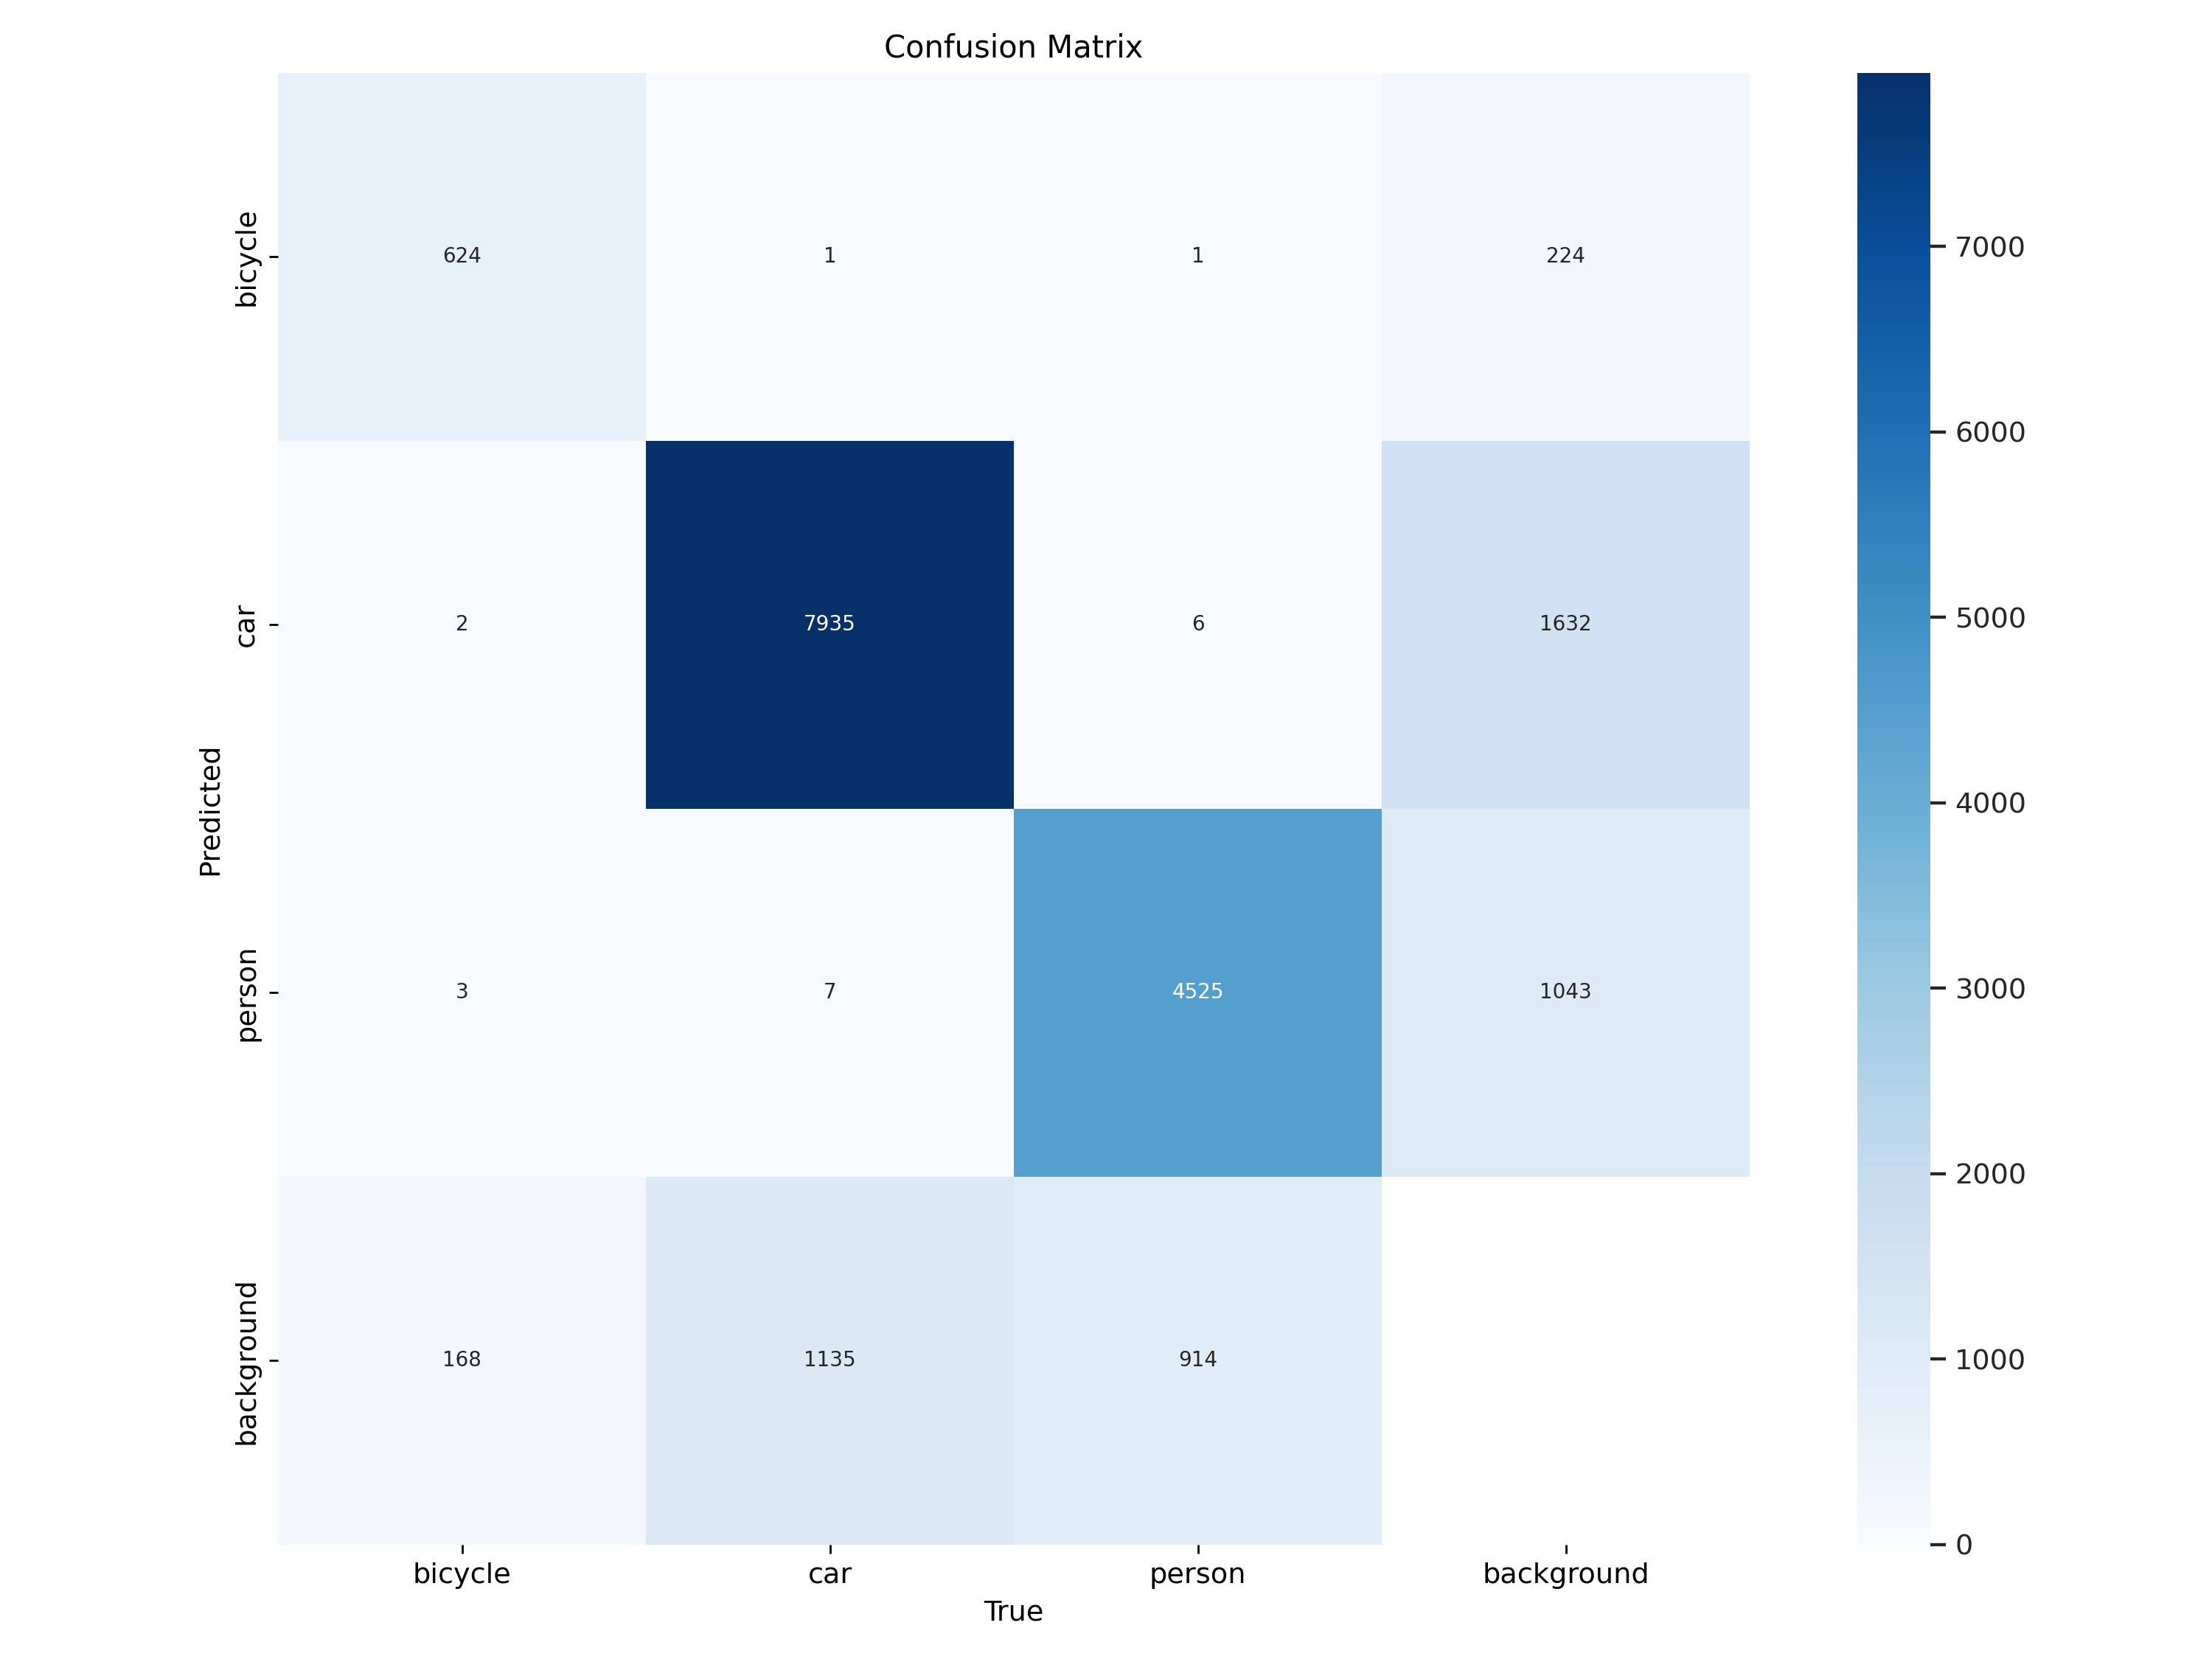

In [ ]:
Image(filename=f'/content/runs/detect/train13/confusion_matrix.png', width=600)

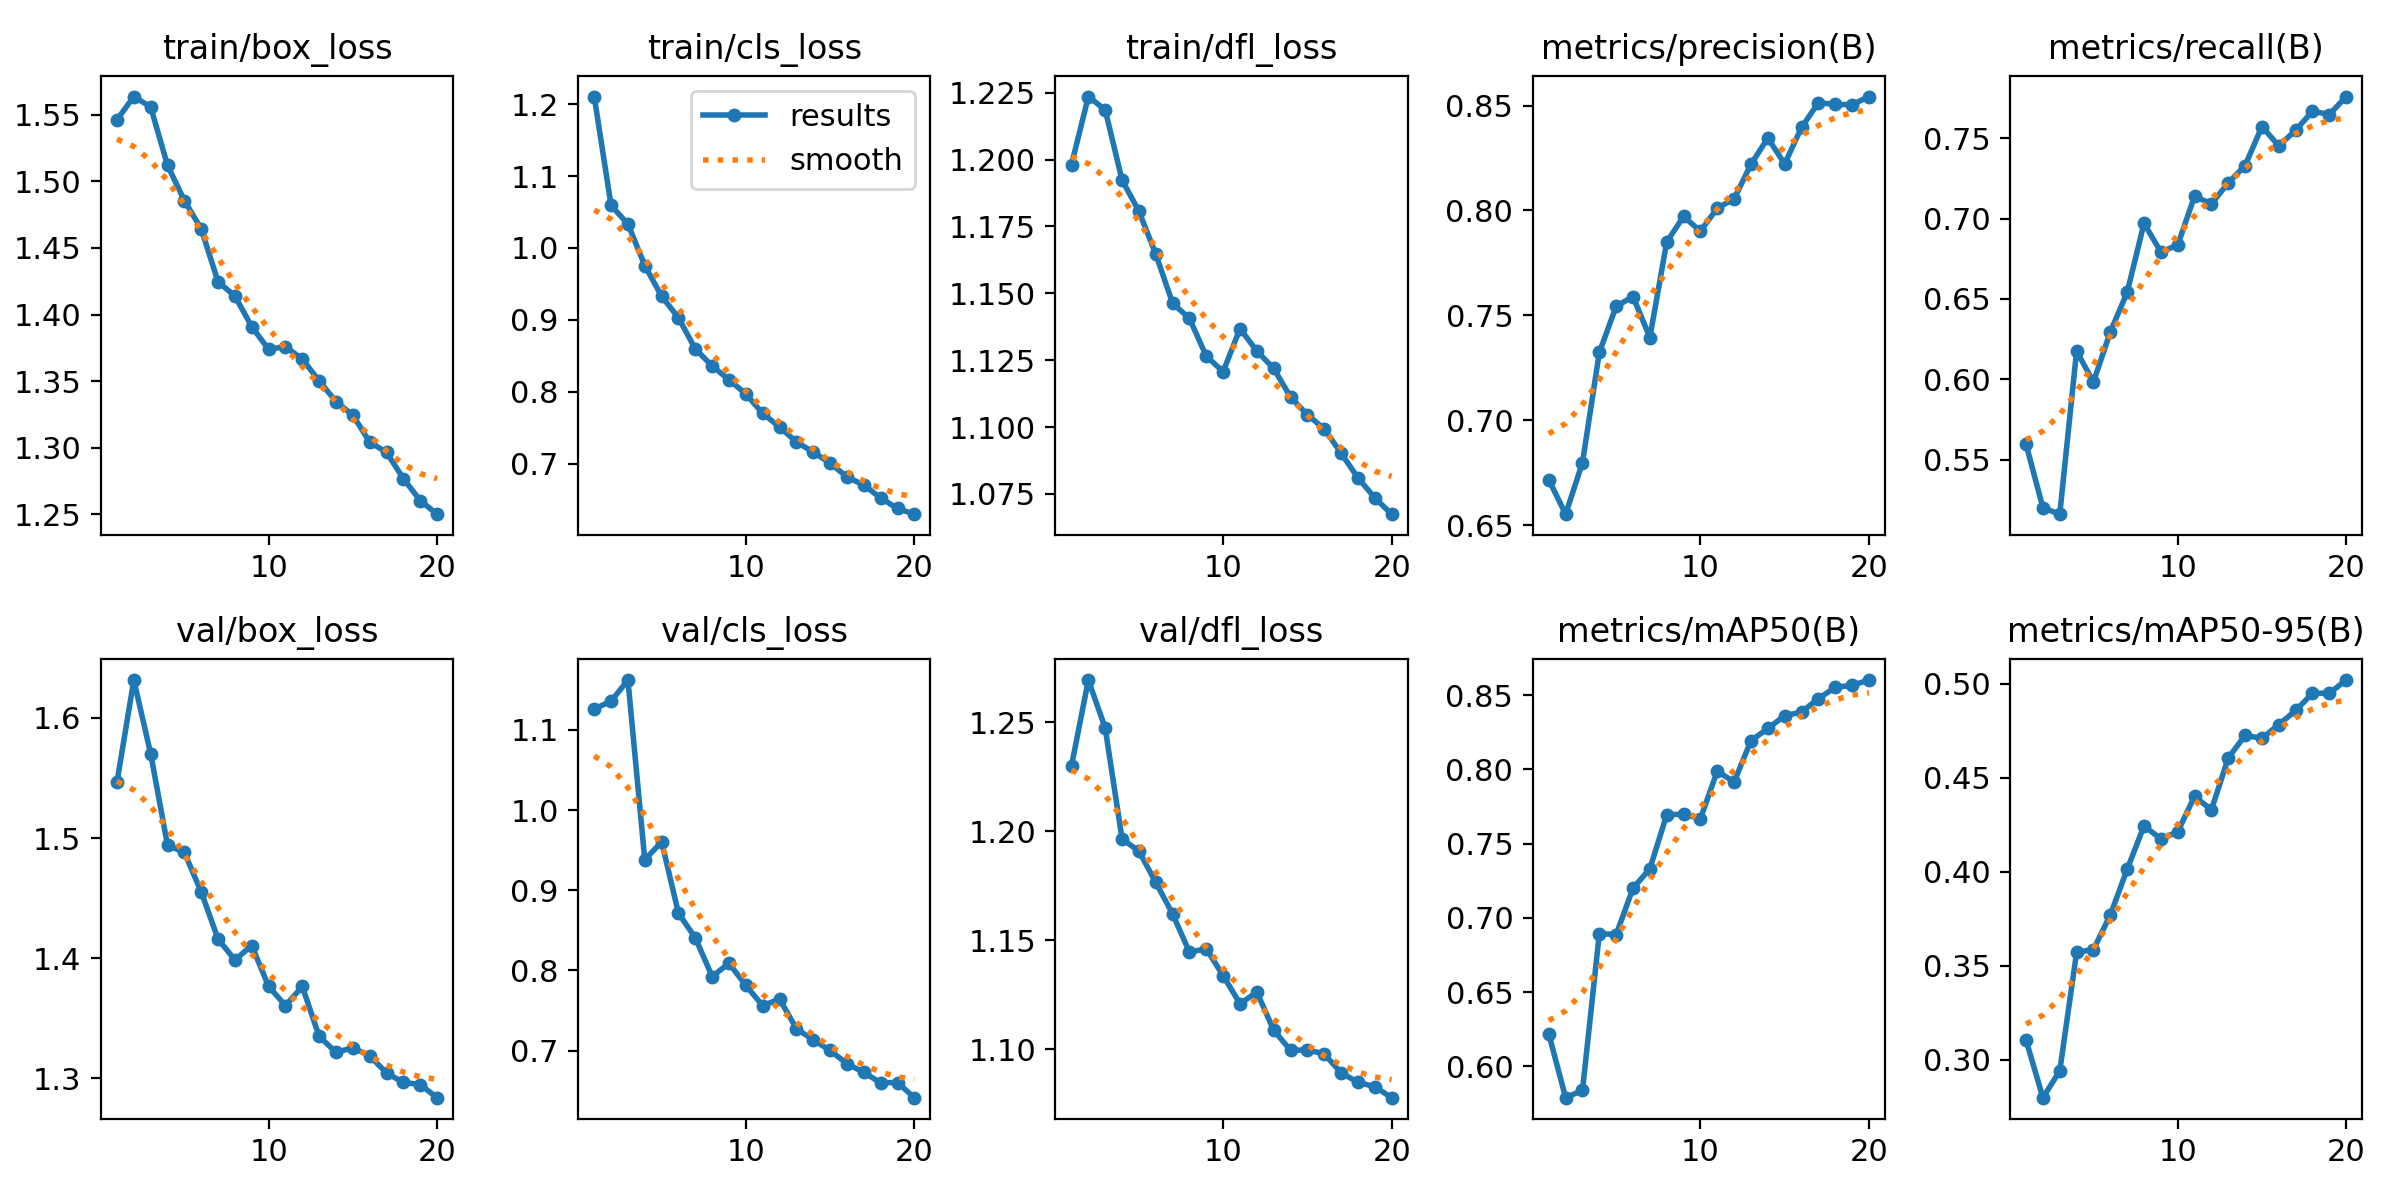

In [ ]:
Image(filename=f'/content/runs/detect/train13/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train13/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Infrared-Object-Detection-1/valid/labels.cache... 1783 images, 0 backgrounds, 0 corrupt: 100% 1783/1783 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Infrared-Object-Detection-1/valid/images/FLIR_07525_jpeg_jpg.rf.21a7f8937be95c4dd7bc341f69f200d2.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 112/112 [00:53<00:00,  2.08it/s]
                   all       1783      15321      0.857      0.776      0.861      0.503
               bicycle       1783        797      0.822      0.723        0.8      0.406
                   car       1783       9078      0.882      0.827      0.912      0.608
                person       1783       5446      0.866      0.779      0.873      0.496
Speed: 0.4ms preprocess, 21.0ms inference, 0.0ms 

In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train13/weights/best.pt conf=0.5 source={dataset.location}/test/images save_txt=true save_conf=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/891 /content/Infrared-Object-Detection-1/test/images/FLIR_00006_jpeg_jpg.rf.15b1c831bd5cd7d61db1e7e36bebde42.jpg: 640x640 2 cars, 37.1ms
image 2/891 /content/Infrared-Object-Detection-1/test/images/FLIR_00007_jpeg_jpg.rf.475bacbbae437e8a1e2c03eb455a49a7.jpg: 640x640 2 cars, 37.1ms
image 3/891 /content/Infrared-Object-Detection-1/test/images/FLIR_00009_jpeg_jpg.rf.9ed1369c2acf884c927887fceb55f5c9.jpg: 640x640 3 cars, 37.0ms
image 4/891 /content/Infrared-Object-Detection-1/test/images/FLIR_00036_jpeg_jpg.rf.f81f1c98b0c7d6d6d9810e9854b626c5.jpg: 640x640 1 car, 37.0ms
image 5/891 /content/Infrared-Object-Detection-1/test/images/FLIR_00045_jpeg_jpg.rf.cd35ed92590af7c09c155eb7ec8abc94.jpg: 640x640 6 cars, 27.7ms
image 6/891 /content/Infrared-Object-Detection-1/test/images/FLI

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, height=600))
      print("\n")